In [133]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import tensorflow as tf

In [134]:
#Reading the file
df = pd.read_csv('water_potability.csv')

In [135]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [137]:
#Check for null values in the data
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### We do see some null values, which we will deal with later

Yes =  811
No =  1200


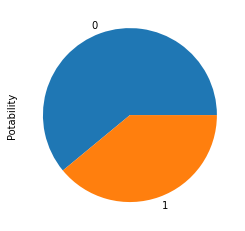

In [138]:
#Checking for the percent of values of Yes & No in Water Potability
df['Potability'].value_counts().plot(kind ='pie')
print("Yes = ",df[df['Potability']==1].value_counts().sum())
print("No = ",df[df['Potability']==0].value_counts().sum())

#### The data is imbalanced. SMOTE may be required in order to balance the data.

In [139]:
list_of_features = []
for items in df:
    list_of_features.append(items)

### Dealing with Missing Data 

In [140]:
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1684.000000,1998.000000,1998.000000,1998.000000,1510.000000,1998.000000,1998.000000,1891.000000,1998.000000,1998.0
mean,7.085378,196.733292,21777.490788,7.092175,334.564290,426.730454,14.364335,66.303555,3.965800,0.0
std,1.683499,31.057540,8543.068788,1.501045,36.745549,80.047317,3.334554,16.079320,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.037723,177.823265,15663.057382,6.155640,311.264006,368.498530,12.101057,55.706530,3.444062,0.0
50%,7.035456,197.123423,20809.618280,7.090334,333.389426,422.229331,14.293508,66.542198,3.948076,0.0
75%,8.155510,216.120687,27006.249009,8.066462,356.853897,480.677198,16.649485,77.277704,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [141]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1101.000000,1278.000000,1278.000000,1278.000000,985.000000,1278.000000,1278.000000,1223.000000,1278.000000,1278.0
mean,7.073783,195.800744,22383.991018,7.169338,332.566990,425.383800,14.160893,66.539684,3.968328,1.0
std,1.448048,35.547041,9101.010208,1.702988,47.692818,82.048446,3.263907,16.327419,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.179312,174.330531,15668.985035,6.094134,300.763772,360.939023,12.033897,56.014249,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,331.838167,420.712729,14.162809,66.678214,3.958576,1.0
75%,7.933068,218.003420,27973.236446,8.199261,365.941346,484.155911,16.356245,77.380975,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


##### Potability = 0  (Mean)

pH: 7.085378

Sulfate: 334.564290

Trihalomethanes: 66.539684	

##### Potability = 1  (Mean)

pH: 7.073783

Sulfate: 332.566990

Trihalomethanes: 66.539684

###### Hence, we see means are not very diffrent for Potability = 0 or 1. Hence, we can replace NaN values in all three with the means


In [142]:
#Filling the NaN values
df['ph'].fillna(value=df['ph'].mean(),inplace=True)
df['Sulfate'].fillna(value=df['Sulfate'].mean(),inplace=True)
df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].mean(),inplace=True)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


###### We are ready for Exploratory Data Analysis

## EDA

#### Creating Boxplots

Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


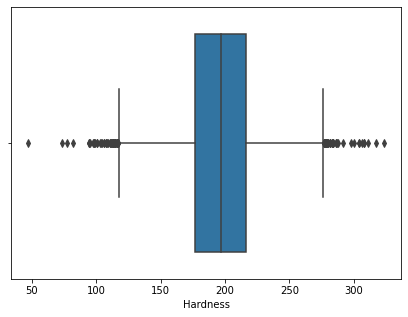

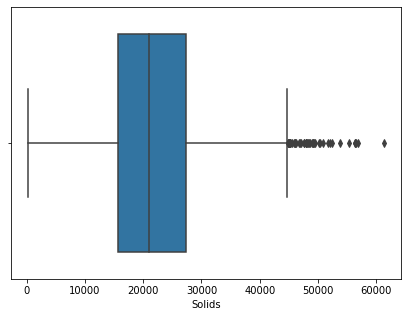

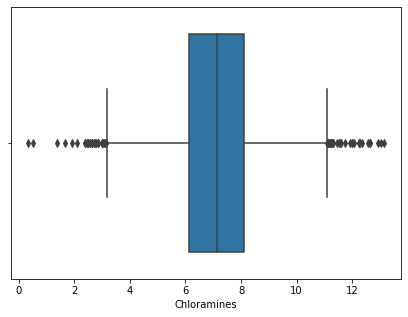

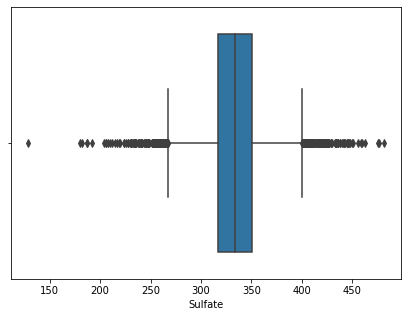

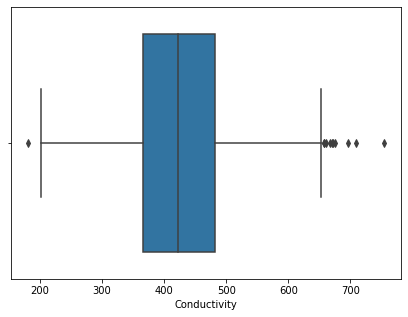

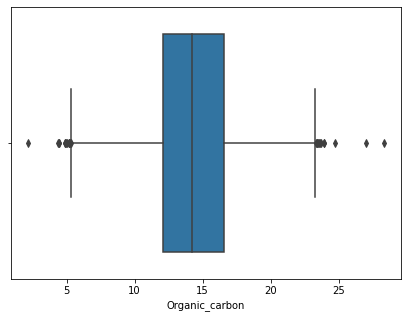

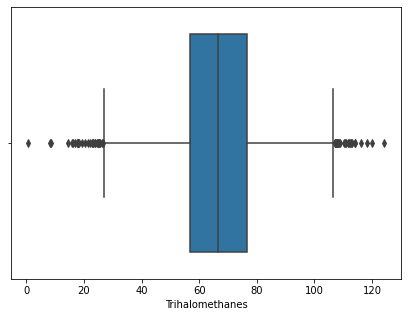

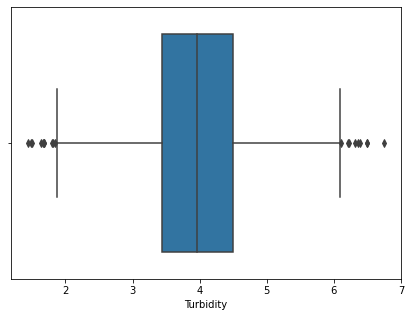

In [144]:
for items in list_of_features[1:-1]:
    plt.figure(figsize=(7,5))
    sns.boxplot(x = df[items])
    print(items)

There are not very irrrelevant outliers in the system

#### Creating Histplots

Hardness
Solids
Chloramines
Sulfate
Conductivity
Organic_carbon
Trihalomethanes
Turbidity


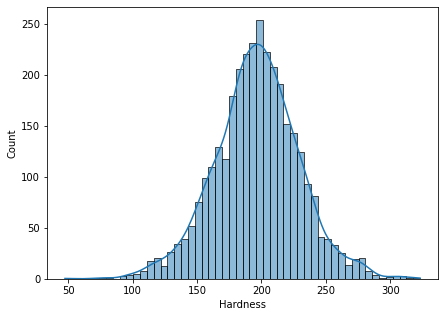

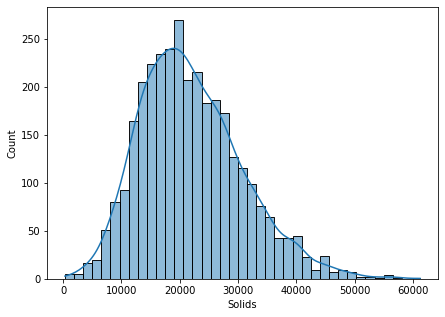

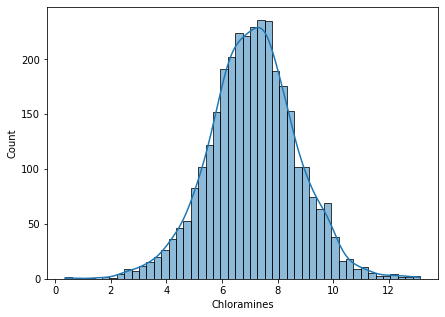

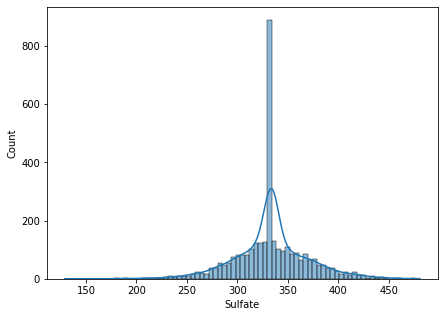

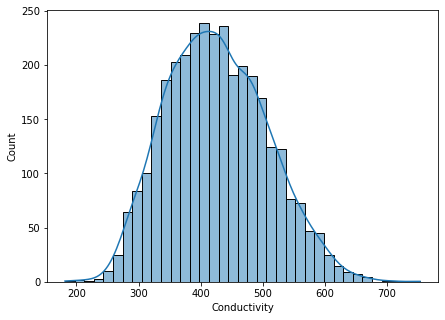

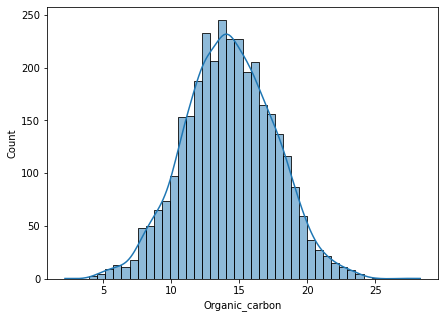

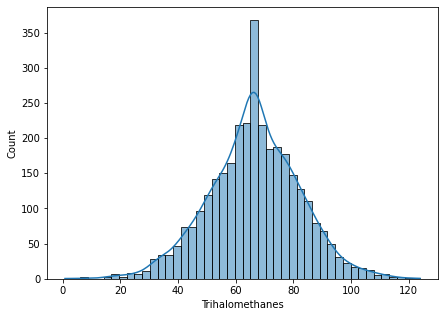

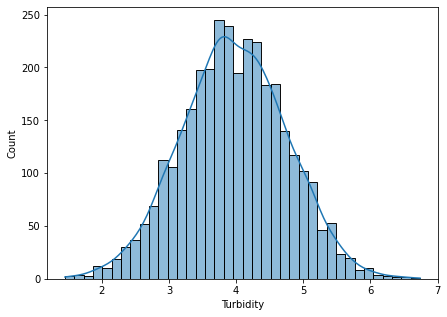

In [145]:
for items in list_of_features[1:-1]:
    plt.figure(figsize=(7,5))
    sns.histplot(df,x = df[items],kde=True)
    print(items)

In [146]:
for items in list_of_features:
    print(df[items].skew())

0.027795881574044657
-0.0393417047767249
0.6216344855169127
-0.01209844012438221
-0.04118437258768767
0.2644902239264119
0.025532582090242492
-0.08516101983758483
-0.007816642377392604
0.4507837491078628


The skew of the histplot are almost 0. Hence, there are no outliers in the data that need to be removed.

### Calculating Feature Importance and Correlation Heatmap

In [147]:
#Splitting the data
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

Y is  3276
X is <class 'numpy.ndarray'>
Feature: 0, Score: 0.09965
Feature: 1, Score: 0.11694
Feature: 2, Score: 0.11566
Feature: 3, Score: 0.12052
Feature: 4, Score: 0.14013
Feature: 5, Score: 0.11076
Feature: 6, Score: 0.09895
Feature: 7, Score: 0.09886
Feature: 8, Score: 0.09852


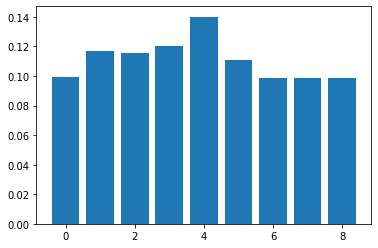

In [148]:
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model
model = XGBRegressor()
print("Y is ", len(y))
print("X is", type(X))
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature Importance is calculated using XGBoost. This helps us understand the coefficients of the features - Thus helping us understand which are the redundant for the experiment. However, there is no significant diffrence in the features - hence we can not drop any features.

<AxesSubplot:>

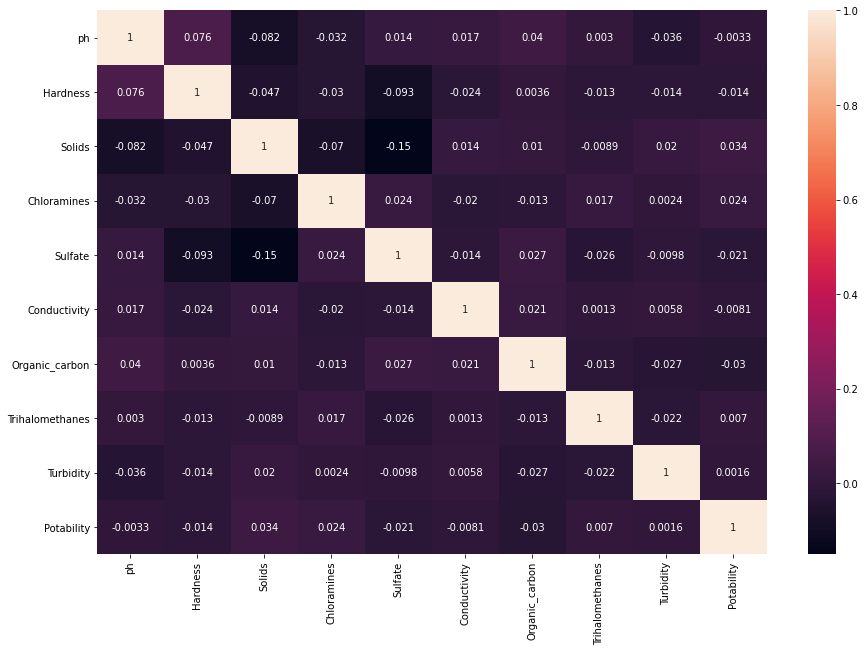

In [149]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

##### There are also no significant correlations in the Potability and the other features. This, combined with feature importance suggests that these values do not add any great values to thde model. Hence, the accuracy may not be very high.

### Model Prediction

#### Note: SMOTE was used to balance the dataset but the accuracy went down to 64.3% at peak. Hence, we omitted the part.

In [150]:
#Splitting the data
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [151]:
#Standardizing the model
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [152]:
#Importing all the models
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

In [153]:
#Importing all the datasets
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV

In [154]:
models =[("LR", LogisticRegression(max_iter=100)),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),("GNB", GaussianNB()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),("BNB", BernoulliNB()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []

for name,model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = accuracy_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score))
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [155]:
finalResults #Calling the function

[('XGB', 0.673992673992674),
 ('SVC', 0.6715506715506715),
 ('RF', 0.6666666666666666),
 ('NuSVC', 0.6605616605616605),
 ('KNN', 0.6288156288156288),
 ('ADA', 0.6263736263736264),
 ('LR', 0.6166056166056166),
 ('Ridge', 0.6166056166056166),
 ('BNB', 0.612942612942613),
 ('GNB', 0.6092796092796092),
 ('DTC', 0.5836385836385837),
 ('SGDC', 0.5665445665445665),
 ('Perc', 0.5641025641025641),
 ('NC', 0.5067155067155067),
 ('PAC', 0.4835164835164835)]

   ### Hyper-Parameter Tuning for Logistic Regression

#### K -fold Validation

In [156]:
#10 - parting the dataset and then calculating the accuracy again
accuracies = cross_val_score(estimator = SVC(), X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 67.52 %
Standard Deviation: 1.68 %


#### Hyperparameter Tuning

In [157]:
#parameter sets
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 67.68 %
Best Parameters: {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}


### Hence we conclude that SVC is the best classifier in this case and we can predict the potability of water around 67.68% times correctly!

### Creating an Artifical Nueral Network

In [158]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [159]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [160]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
77/77 [==============================] - 0s 644us/step - loss: 0.7085 - accuracy: 0.5779
Epoch 2/100
77/77 [==============================] - 0s 718us/step - loss: 0.6894 - accuracy: 0.6032
Epoch 3/100
77/77 [==============================] - 0s 765us/step - loss: 0.6782 - accuracy: 0.6048
Epoch 4/100
77/77 [==============================] - 0s 717us/step - loss: 0.6704 - accuracy: 0.6146
Epoch 5/100
77/77 [==============================] - 0s 768us/step - loss: 0.6636 - accuracy: 0.6203
Epoch 6/100
77/77 [==============================] - 0s 722us/step - loss: 0.6585 - accuracy: 0.6280
Epoch 7/100
77/77 [==============================] - 0s 788us/step - loss: 0.6541 - accuracy: 0.6325
Epoch 8/100
77/77 [==============================] - ETA: 0s - loss: 0.6474 - accuracy: 0.64 - 0s 817us/step - loss: 0.6506 - accuracy: 0.6353
Epoch 9/100
77/77 [==============================] - 0s 1ms/step - loss: 0.6471 - accuracy: 0.6378
Epoch 10/100
77/77 [==============================]

In [161]:
y_pred = ann.predict(X_test)

In [162]:
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [0 0]
 ...
 [0 1]
 [1 1]
 [0 0]]


In [163]:
score = accuracy_score(y_test, y_pred)
score

0.6495726495726496

##### This ANN does not work as well as SVC. More changes can help in creating better ANNs